<a href="https://colab.research.google.com/github/Sercan1111/TimeSeriesForecastLSTMARIMA/blob/main/3CryptoLSTMARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
import os
import pandas as pd

def read_sql_files(folder_path, start_date, end_date):
    # Tüm dosyaları listele
    files = os.listdir(folder_path)
    sql_files = [file for file in files if file.endswith('.sql')]

    # Belirtilen tarih aralığındaki dosyaları filtrele
    filtered_files = [file for file in sql_files if start_date <= file.split('_')[3] <= end_date]

    if not filtered_files:
        print(f"No files found in the date range {start_date} to {end_date} in folder {folder_path}")
        return pd.DataFrame(columns=['timestamp', 'open', 'high', 'low', 'close', 'volume'])

    # SQL dosyalarını parça parça oku ve DataFrame oluştur
    chunk_size = 10000  # Her seferde okunacak satır sayısı
    data_frames = []
    for file in filtered_files:
        file_path = os.path.join(folder_path, file)
        with open(file_path, 'r') as f:
            rows = []
            for line in f:
                if 'INSERT INTO' in line:
                    values_str = line.split('VALUES')[1].strip().strip('();')
                    values = values_str.split(',')
                    timestamp = int(values[0])
                    open_price = float(values[1])
                    high_price = float(values[2])
                    low_price = float(values[3])
                    close_price = float(values[4])
                    volume = float(values[5])
                    rows.append([timestamp, open_price, high_price, low_price, close_price, volume])
                    if len(rows) >= chunk_size:
                        df_chunk = pd.DataFrame(rows, columns=['timestamp', 'open', 'high', 'low', 'close', 'volume'])
                        data_frames.append(df_chunk)
                        rows = []  # Satırları sıfırla
            if rows:
                df_chunk = pd.DataFrame(rows, columns=['timestamp', 'open', 'high', 'low', 'close', 'volume'])
                data_frames.append(df_chunk)

    # Tüm DataFrame'leri birleştir
    merged_df = pd.concat(data_frames, ignore_index=True)
    return merged_df

# Klasörleri ve tarih aralığını belirtin
crypto_folders = ['algo','btc','dot']
base_path = '/content/drive/MyDrive/Colab_Notebooks/prices/'
start_date = '2021-06-01'
end_date = '2023-06-01'

# Tüm kripto paralar için verileri okuyun
crypto_data = {}
for folder in crypto_folders:
    folder_path = os.path.join(base_path, folder)
    df = read_sql_files(folder_path, start_date, end_date)
    df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms')
    df.set_index('timestamp', inplace=True)
    df.rename(columns={
        'open': f'{folder}_open',
        'high': f'{folder}_high',
        'low': f'{folder}_low',
        'close': f'{folder}_close',
        'volume': f'{folder}_volume'
    }, inplace=True)
    crypto_data[folder] = df

# BTC timestamp'ini ana timestamp olarak kullanarak verileri birleştirme
btc_df = crypto_data['btc']
merged_data = btc_df.copy()

for folder, df in crypto_data.items():
    if folder != 'btc':
        merged_data = merged_data.join(df, how='left')

# Sonuçları kontrol etme
print(merged_data.head())
print(merged_data.tail())

# Verilerin genel görünümünü kontrol etme
print("\nMerged data head:")
print(merged_data.head())

print("\nMerged data tail:")
print(merged_data.tail())


            btc_open  btc_high  btc_low  btc_close  btc_volume  algo_open  \
timestamp                                                                   
2023-06-01   27215.1   27238.0  27203.5    27222.9   43.309783     0.1478   
2023-06-01   27215.1   27238.0  27203.5    27222.9   43.309783     0.1478   
2023-06-01   27215.1   27238.0  27203.5    27222.9   43.309783     0.1478   
2023-06-01   27215.1   27238.0  27203.5    27222.9   43.309783     0.1478   
2023-06-01   27215.1   27238.0  27203.5    27222.9   43.309783     0.1478   

            algo_high  algo_low  algo_close  algo_volume  dot_open  dot_high  \
timestamp                                                                      
2023-06-01     0.1478    0.1477      0.1478       1064.0     5.314     5.317   
2023-06-01     0.1478    0.1477      0.1478       1064.0     5.314     5.317   
2023-06-01     0.1478    0.1477      0.1478       1064.0     5.314     5.317   
2023-06-01     0.1478    0.1477      0.1478       1064.0    

In [2]:
merged_data.head()

,btc_open,btc_high,btc_low,btc_close,btc_volume,algo_open,algo_high,algo_low,algo_close,algo_volume,dot_open,dot_high,dot_low,dot_close,dot_volume
timestamp,,,,,,,,,,,,,,,
2023-06-01,27215.1,27238.0,27203.5,27222.9,43.309783,0.1478,0.1478,0.1477,0.1478,1064.0,5.314,5.317,5.313,5.313,868.728
2023-06-01,27215.1,27238.0,27203.5,27222.9,43.309783,0.1478,0.1478,0.1477,0.1478,1064.0,5.314,5.317,5.313,5.313,868.728
2023-06-01,27215.1,27238.0,27203.5,27222.9,43.309783,0.1478,0.1478,0.1477,0.1478,1064.0,5.314,5.317,5.313,5.313,868.728
2023-06-01,27215.1,27238.0,27203.5,27222.9,43.309783,0.1478,0.1478,0.1477,0.1478,1064.0,5.314,5.317,5.313,5.313,868.728
2023-06-01,27215.1,27238.0,27203.5,27222.9,43.309783,0.1478,0.1478,0.1477,0.1478,1064.0,5.314,5.317,5.313,5.313,868.728


In [3]:
# BTC verilerindeki eksik timestamp'leri kontrol etme
def check_missing_timestamps(df, freq='T'):
    full_range = pd.date_range(start=df.index.min(), end=df.index.max(), freq=freq)
    missing_timestamps = full_range.difference(df.index)
    return missing_timestamps

# BTC verilerindeki eksik timestamp'leri kontrol etme (dakikalık veri için)
missing_timestamps = check_missing_timestamps(merged_data[['btc_close']])

print(f"Missing timestamps (total {len(missing_timestamps)}):")
print(missing_timestamps)


<ipython-input-3-b18eb129535c>:3: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  full_range = pd.date_range(start=df.index.min(), end=df.index.max(), freq=freq)


Missing timestamps (total 0):
DatetimeIndex([], dtype='datetime64[ns]', freq='min')


In [4]:
# Check for missing values in the merged data
def check_missing_values(df, crypto_folders):
    missing_info = {}
    for crypto in crypto_folders:
        crypto_close_column = f'{crypto}_close'
        missing_count = df[crypto_close_column].isnull().sum()
        missing_timestamps = df[df[crypto_close_column].isnull()].index
        missing_info[crypto] = {
            'missing_count': missing_count,
            'missing_timestamps': missing_timestamps
        }
    return missing_info

# Get missing values information
missing_info = check_missing_values(merged_data, crypto_folders)

# Print missing values information
for crypto, info in missing_info.items():
    print(f"Crypto: {crypto}")
    print(f"Missing values count: {info['missing_count']}")
    print(f"Missing timestamps: {info['missing_timestamps']}\n")


Crypto: algo
Missing values count: 4436
Missing timestamps: DatetimeIndex(['2023-06-01 00:40:00', '2023-06-01 00:40:00',
               '2023-06-01 02:27:00', '2023-06-01 02:27:00',
               '2023-06-01 04:03:00', '2023-06-01 04:03:00',
               '2023-06-01 04:09:00', '2023-06-01 04:09:00',
               '2023-06-01 04:38:00', '2023-06-01 04:38:00',
               ...
               '2023-07-01 10:57:00', '2023-07-01 11:34:00',
               '2023-07-01 11:36:00', '2023-07-01 11:52:00',
               '2023-07-01 11:53:00', '2023-07-01 11:59:00',
               '2023-07-01 12:19:00', '2023-07-01 15:40:00',
               '2023-07-01 20:48:00', '2023-07-01 22:09:00'],
              dtype='datetime64[ns]', name='timestamp', length=4436, freq=None)

Crypto: btc
Missing values count: 0
Missing timestamps: DatetimeIndex([], dtype='datetime64[ns]', name='timestamp', freq=None)

Crypto: dot
Missing values count: 19349
Missing timestamps: DatetimeIndex(['2023-06-01 05:19:00', '20

In [5]:
import pandas as pd

# Eksik verileri doldurma fonksiyonu
def fill_missing_values(df, method='linear'):
    if method == 'linear':
        return df.interpolate(method='linear')
    elif method == 'ffill':
        return df.ffill()
    elif method == 'bfill':
        return df.bfill()
    else:
        raise ValueError("Invalid fill method. Use 'linear', 'ffill' or 'bfill'.")

# Çok fazla eksik verisi olan kripto paraları belirleme
threshold = 0.3  # Eksik verilerin oranı (örneğin %50)
total_timestamps = len(merged_data)
to_remove = [crypto for crypto, info in missing_info.items() if info['missing_count'] / total_timestamps > threshold]

# Az eksik verisi olan kripto paraları linear interpolation ile doldurma
for crypto, info in missing_info.items():
    if crypto not in to_remove:
        merged_data[f'{crypto}_close'] = fill_missing_values(merged_data[f'{crypto}_close'], method='linear')

# Çok eksik verisi olan kripto paraları çıkarma
merged_data.drop(columns=[f'{crypto}_close' for crypto in to_remove], inplace=True)

# Sonuçları kontrol etme
print("\nFinal merged data head:")
print(merged_data.head())


print(f"\nRemoved cryptos due to excessive missing values: {to_remove}")



Final merged data head:
            btc_open  btc_high  btc_low  btc_close  btc_volume  algo_open  \
timestamp                                                                   
2023-06-01   27215.1   27238.0  27203.5    27222.9   43.309783     0.1478   
2023-06-01   27215.1   27238.0  27203.5    27222.9   43.309783     0.1478   
2023-06-01   27215.1   27238.0  27203.5    27222.9   43.309783     0.1478   
2023-06-01   27215.1   27238.0  27203.5    27222.9   43.309783     0.1478   
2023-06-01   27215.1   27238.0  27203.5    27222.9   43.309783     0.1478   

            algo_high  algo_low  algo_close  algo_volume  dot_open  dot_high  \
timestamp                                                                      
2023-06-01     0.1478    0.1477      0.1478       1064.0     5.314     5.317   
2023-06-01     0.1478    0.1477      0.1478       1064.0     5.314     5.317   
2023-06-01     0.1478    0.1477      0.1478       1064.0     5.314     5.317   
2023-06-01     0.1478    0.1477    

In [6]:
import pandas as pd

# İlk ve son tarihleri belirleme
start_date = merged_data.index.min()
end_date = merged_data.index.max()

# Tüm dakikalık timestamp'leri oluşturma (2 yıllık süre)
all_timestamps = pd.date_range(start=start_date, end=end_date, freq='T')

# Orijinal veri setinde olmayan timestamp'leri bulma
missing_timestamps = all_timestamps.difference(merged_data.index)

# Eksik verileri doldurma
for column in merged_data.columns:
    missing_values_count = merged_data[column].isnull().sum()
    total_values_count = len(merged_data)
    missing_ratio = missing_values_count / total_values_count

    if missing_ratio <= 0.3:
        # Linear interpolation ile eksik verileri doldurma
        merged_data[column] = merged_data[column].interpolate(method='linear')
        print(f"Filled missing values for {column} with linear interpolation.")
    else:
        print(f"{column} has too many missing values ({missing_ratio * 100:.2f}%). Consider removing this asset from the dataset.")

# Sonuçları kontrol etme
print("\nFilled data head:")
print(merged_data.head())

print("\nFilled data tail:")
print(merged_data.tail())

# Eğer eksik veriler hala varsa, onları kontrol etme
still_missing = merged_data.isnull().sum()
print("\nStill missing values after interpolation:")
print(still_missing[still_missing > 0])


<ipython-input-6-d63340ce2a40>:8: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  all_timestamps = pd.date_range(start=start_date, end=end_date, freq='T')


Filled missing values for btc_open with linear interpolation.
Filled missing values for btc_high with linear interpolation.
Filled missing values for btc_low with linear interpolation.
Filled missing values for btc_close with linear interpolation.
Filled missing values for btc_volume with linear interpolation.
Filled missing values for algo_open with linear interpolation.
Filled missing values for algo_high with linear interpolation.
Filled missing values for algo_low with linear interpolation.
Filled missing values for algo_close with linear interpolation.
Filled missing values for algo_volume with linear interpolation.
Filled missing values for dot_open with linear interpolation.
Filled missing values for dot_high with linear interpolation.
Filled missing values for dot_low with linear interpolation.
Filled missing values for dot_close with linear interpolation.
Filled missing values for dot_volume with linear interpolation.

Filled data head:
            btc_open  btc_high  btc_low 

In [7]:
merged_data.head(10)

,btc_open,btc_high,btc_low,btc_close,btc_volume,algo_open,algo_high,algo_low,algo_close,algo_volume,dot_open,dot_high,dot_low,dot_close,dot_volume
timestamp,,,,,,,,,,,,,,,
2023-06-01 00:00:00,27215.1,27238.0,27203.5,27222.90,43.309783,0.1478,0.1478,0.1477,0.1478,1064.0,5.3140,5.3170,5.313,5.313,868.72800
2023-06-01 00:00:00,27215.1,27238.0,27203.5,27222.90,43.309783,0.1478,0.1478,0.1477,0.1478,1064.0,5.3140,5.3170,5.313,5.313,868.72800
2023-06-01 00:00:00,27215.1,27238.0,27203.5,27222.90,43.309783,0.1478,0.1478,0.1477,0.1478,1064.0,5.3140,5.3170,5.313,5.313,868.72800
2023-06-01 00:00:00,27215.1,27238.0,27203.5,27222.90,43.309783,0.1478,0.1478,0.1477,0.1478,1064.0,5.3140,5.3170,5.313,5.313,868.72800
2023-06-01 00:00:00,27215.1,27238.0,27203.5,27222.90,43.309783,0.1478,0.1478,0.1477,0.1478,1064.0,5.3140,5.3170,5.313,5.313,868.72800
2023-06-01 00:00:00,27215.1,27238.0,27203.5,27222.90,43.309783,0.1478,0.1478,0.1477,0.1478,1064.0,5.3140,5.3170,5.313,5.313,868.72800
2023-06-01 00:01:00,27218.5,27233.8,27217.8,27233.28,3.276975,0.1477,0.1477,0.1476,0.1476,412.2,5.3161,5.3161,5.308,5.308,133.22939
2023-06-01 00:01:00,27218.5,27233.8,27217.8,27233.28,3.276975,0.1477,0.1477,0.1476,0.1476,412.2,5.3161,5.3161,5.308,5.308,133.22939
2023-06-01 00:01:00,27218.5,27233.8,27217.8,27233.28,3.276975,0.1477,0.1477,0.1476,0.1476,412.2,5.3161,5.3161,5.308,5.308,133.22939


In [8]:
def check_column_types(df):
    for column in df.columns:
        unique_types = df[column].map(type).unique()
        if len(unique_types) > 1:
            print(f"Column '{column}' contains multiple data types: {unique_types}")
        else:
            print(f"Column '{column}' contains a single data type: {unique_types[0]}")

# Sütunların veri tiplerini kontrol etme
print("\nVeri tiplerini kontrol etme sonuçları:")
check_column_types(merged_data)


Veri tiplerini kontrol etme sonuçları:
Column 'btc_open' contains a single data type: <class 'float'>
Column 'btc_high' contains a single data type: <class 'float'>
Column 'btc_low' contains a single data type: <class 'float'>
Column 'btc_close' contains a single data type: <class 'float'>
Column 'btc_volume' contains a single data type: <class 'float'>
Column 'algo_open' contains a single data type: <class 'float'>
Column 'algo_high' contains a single data type: <class 'float'>
Column 'algo_low' contains a single data type: <class 'float'>
Column 'algo_close' contains a single data type: <class 'float'>
Column 'algo_volume' contains a single data type: <class 'float'>
Column 'dot_open' contains a single data type: <class 'float'>
Column 'dot_high' contains a single data type: <class 'float'>
Column 'dot_low' contains a single data type: <class 'float'>
Column 'dot_close' contains a single data type: <class 'float'>
Column 'dot_volume' contains a single data type: <class 'float'>


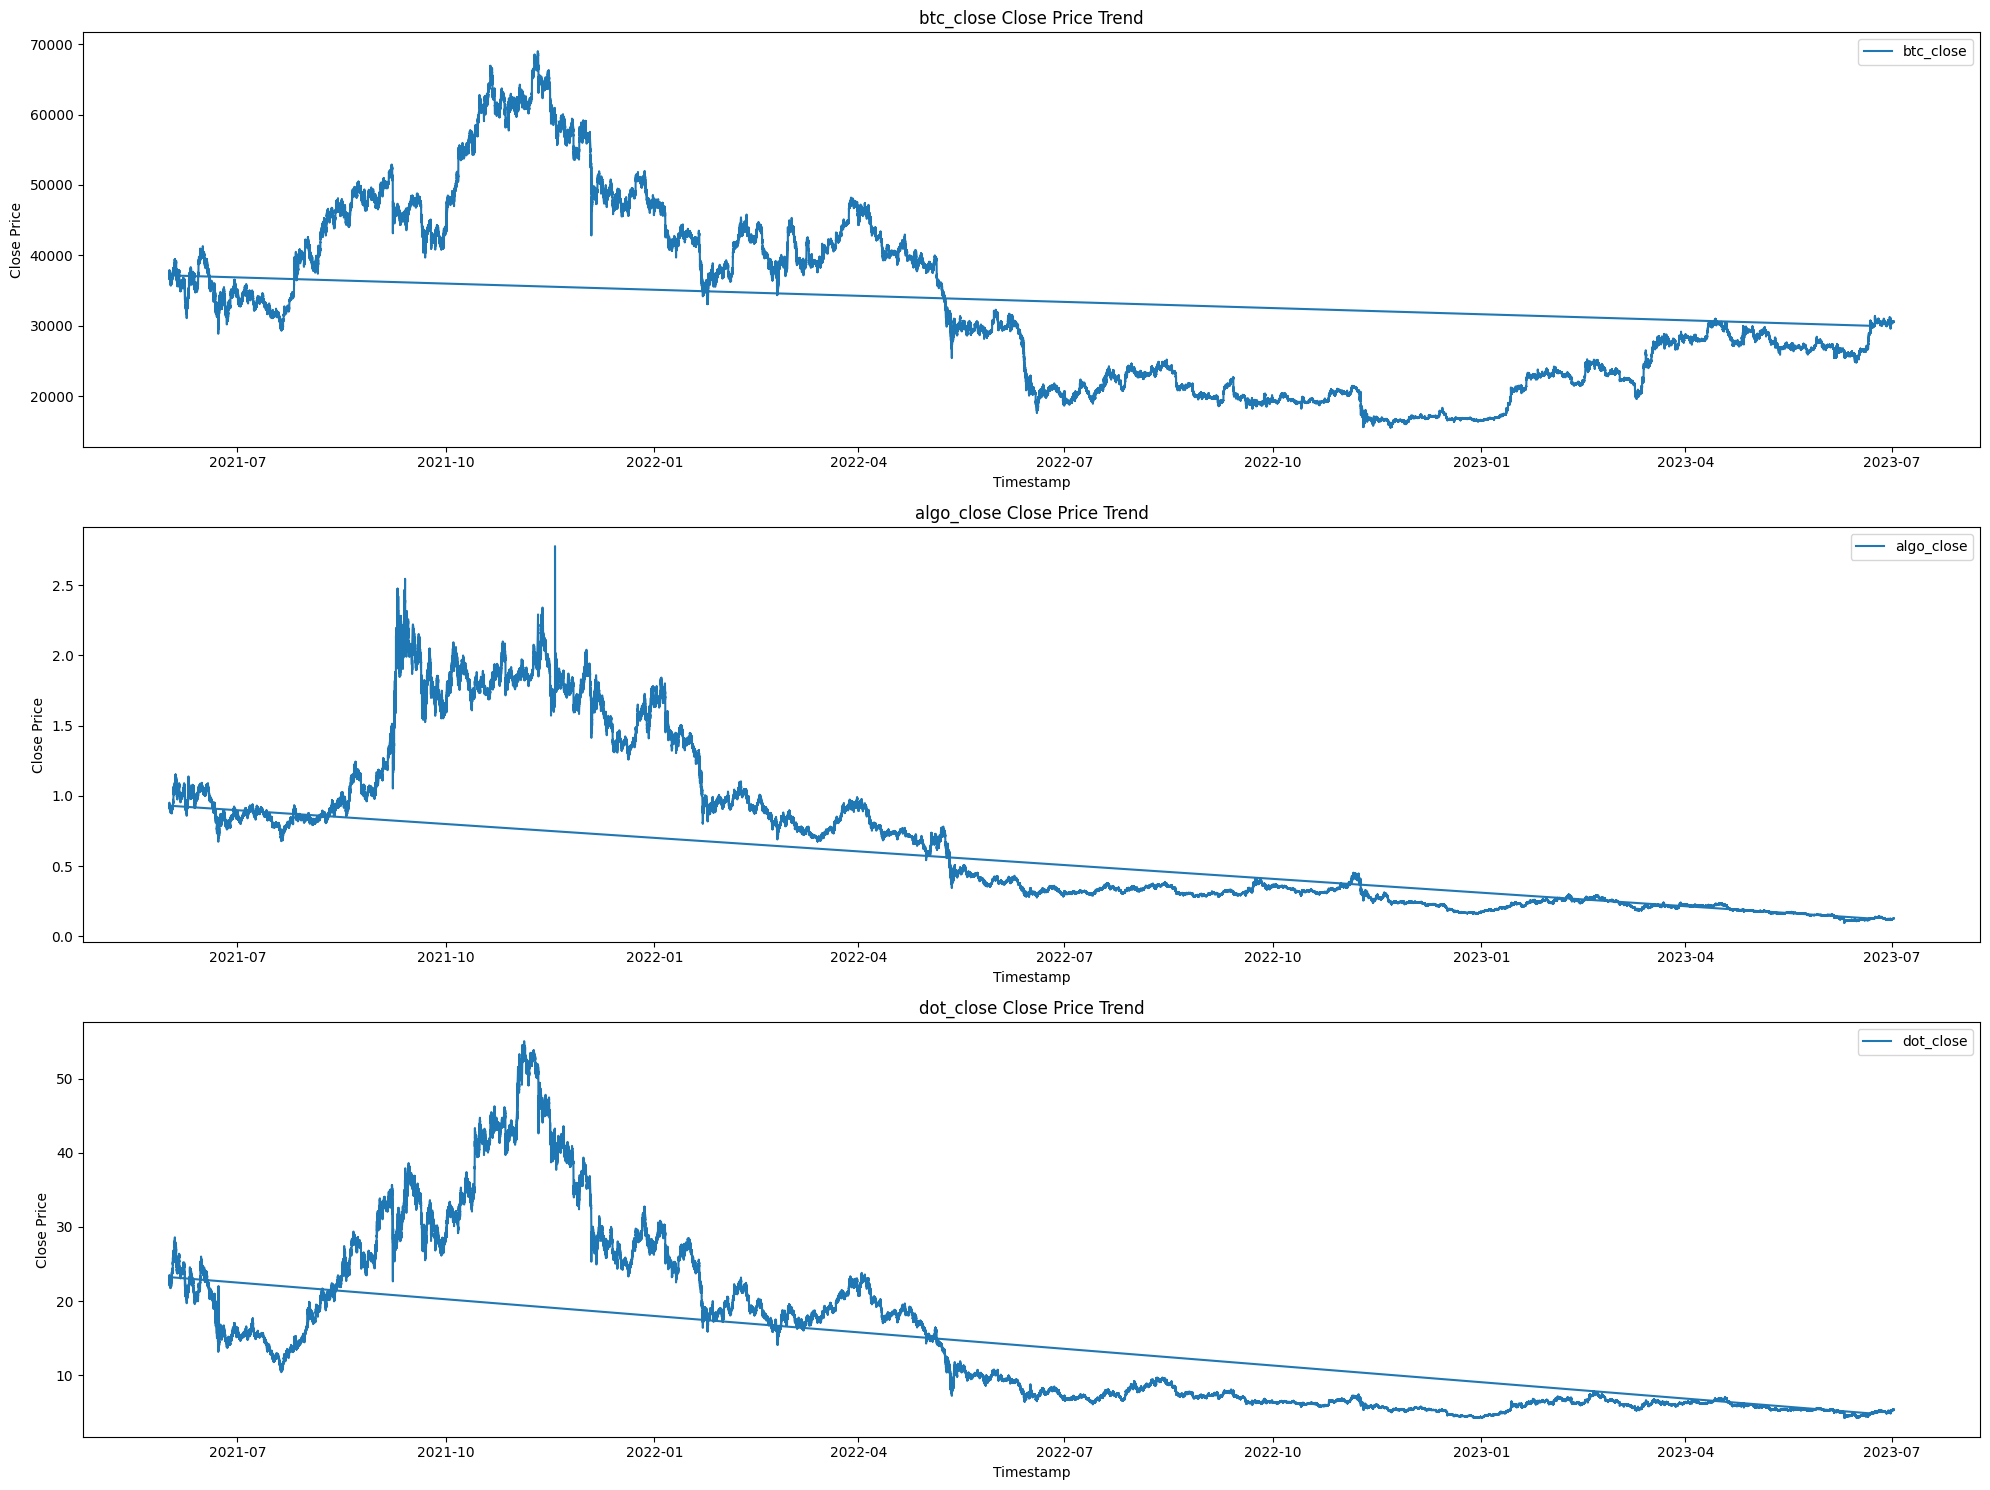

In [9]:
import matplotlib.pyplot as plt

# Sadece close price sütunlarını seçme
close_columns = [col for col in merged_data.columns if 'close' in col]

# Her bir kripto para birimi için line plot oluşturma
plt.figure(figsize=(20, 15))

for i, column in enumerate(close_columns, 1):
    plt.subplot(3, 1, i)  # Her bir close price sütunu için grafik
    plt.plot(merged_data.index, merged_data[column], label=column)
    plt.title(f'{column} Close Price Trend')
    plt.xlabel('Timestamp')
    plt.ylabel('Close Price')
    plt.legend()

plt.tight_layout()
plt.show()


In [10]:
# Günlük olarak yeniden örnekleme ve her günün 00:00 değerini alma
daily_data = merged_data.resample('1H').first()

# Sonuçları kontrol etme
print("\nDaily data head:")
print(daily_data.head())



<ipython-input-10-d4ca17d3632b>:2: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  daily_data = merged_data.resample('1H').first()



Daily data head:
                     btc_open  btc_high       btc_low  btc_close  btc_volume  \
timestamp                                                                      
2021-06-01 00:00:00  37276.24  37279.89  37126.240000   37153.71   36.415537   
2021-06-01 01:00:00  37836.08  37842.80  37751.580000   37781.81   31.288282   
2021-06-01 02:00:00  37200.52  37302.67  37179.000000   37253.28   23.466094   
2021-06-01 03:00:00  36847.00  36856.82  36769.640000   36800.01    4.152750   
2021-06-01 04:00:00  36707.50  36717.97  36613.702375   36636.06    9.901274   

                     algo_open  algo_high  algo_low  algo_close  algo_volume  \
timestamp                                                                      
2021-06-01 00:00:00     0.9357     0.9362    0.9295      0.9295      10302.0   
2021-06-01 01:00:00     0.9405     0.9405    0.9375      0.9375      12102.0   
2021-06-01 02:00:00     0.9169     0.9215    0.9161      0.9200      28640.0   
2021-06-01 03:00:00  

In [11]:
!pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 32.7 MB/s eta 0:00:00


In [11]:
import pmdarima as pm
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Target columns for ARIMA
target_columns = ['btc_close', 'algo_close', 'dot_close']

# Fit ARIMA models to each cryptocurrency's close price and get predictions
def fit_arima_and_get_predictions(df, target_columns):
    arima_predictions = {}
    arima_models = {}

    for column in target_columns:
        # Fit ARIMA using auto_arima
        print(f"Fitting ARIMA model for {column}")
        arima_model = pm.auto_arima(df[column], seasonal=False, trace=True)
        arima_model.fit(df[column])
        arima_models[column] = arima_model

        # Get in-sample predictions
        arima_predictions[column] = arima_model.predict_in_sample()

    return arima_predictions, arima_models

# Apply ARIMA to the daily close prices
arima_predictions, arima_models = fit_arima_and_get_predictions(daily_data, target_columns)

# Convert ARIMA predictions to a DataFrame
arima_predictions_df = pd.DataFrame(arima_predictions, index=daily_data.index)


# Check the ARIMA predictions DataFrame
print("\nARIMA Predictions head:")
print(arima_predictions_df.head())

Fitting ARIMA model for btc_close
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=252105.346, Time=6.01 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=252099.396, Time=0.51 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=252101.153, Time=1.11 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=252101.151, Time=2.13 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=252097.437, Time=0.24 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=252103.401, Time=2.78 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 12.793 seconds
Fitting ARIMA model for algo_close
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-106788.421, Time=15.85 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-106769.283, Time=4.51 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-106795.522, Time=2.72 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-106797.172, Time=3.36 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-106771.074, Time=0.71 sec
 ARIMA(1,1,1)

In [12]:

# Fill initial zeros in ARIMA predictions
def fill_initial_zeros(df):
    for column in df.columns:
        first_non_zero = df[column].replace(0, pd.NA).bfill().iloc[0]
        df[column].replace(0, first_non_zero, inplace=True)

fill_initial_zeros(arima_predictions_df)

# Check the ARIMA predictions DataFrame
print("\nARIMA Predictions head:")
print(arima_predictions_df.head())

# Add ARIMA predictions as features to the dataset
scaled_features = daily_data.copy()
for column in target_columns:
    scaled_features[f'{column}_arima'] = arima_predictions_df[column]

# Her bir kripto para birimi için Min-Max Scaler uygulama (özellik sütunlarına)
scalers_features = {}

# Özellik sütunlarını Min-Max scaler ile ölçeklendirme
for column in scaled_features.columns:
    scaler = MinMaxScaler()
    scaled_features[column] = scaler.fit_transform(scaled_features[[column]])
    scalers_features[column] = scaler

# Sonuçları kontrol etme
print("\nScaled features head:")
print(scaled_features.head())
print(arima_predictions_df.head())


ARIMA Predictions head:
                     btc_close  algo_close  dot_close
timestamp                                            
2021-06-01 00:00:00   37153.71    0.929500  23.225000
2021-06-01 01:00:00   37153.71    0.929500  23.225000
2021-06-01 02:00:00   37781.81    0.937184  23.168424
2021-06-01 03:00:00   37253.28    0.920474  22.577176
2021-06-01 04:00:00   36800.01    0.916513  22.516624

Scaled features head:
                     btc_open  btc_high   btc_low  btc_close  btc_volume  \
timestamp                                                                  
2021-06-01 00:00:00  0.408373  0.408173  0.406344   0.406460    0.020916   
2021-06-01 01:00:00  0.418935  0.418791  0.418150   0.418316    0.017970   
2021-06-01 02:00:00  0.406944  0.408603  0.407340   0.408340    0.013476   
2021-06-01 03:00:00  0.400275  0.400193  0.399611   0.399785    0.002380   
2021-06-01 04:00:00  0.397643  0.397574  0.396667   0.396690    0.005683   

                     algo_open  algo_high

<ipython-input-12-7229c5d452f5>:4: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  first_non_zero = df[column].replace(0, pd.NA).bfill().iloc[0]
<ipython-input-12-7229c5d452f5>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].replace(0, first_non_zero, inplace=True)


In [13]:
# Residuals hesapla (gerçek değerden ARIMA tahminini çıkararak)
residuals = daily_data[target_columns] - arima_predictions_df

# Residuals verisini kontrol etme
print("\nResiduals head:")
print(residuals.head())



Residuals head:
                        btc_close    algo_close     dot_close
timestamp                                                    
2021-06-01 00:00:00  7.275958e-12  6.211476e-12  3.262357e-08
2021-06-01 01:00:00  6.281000e+02  8.000000e-03 -5.799997e-02
2021-06-01 02:00:00 -5.285300e+02 -1.718407e-02 -6.084243e-01
2021-06-01 03:00:00 -4.532700e+02 -4.773869e-03 -8.017645e-02
2021-06-01 04:00:00 -1.639500e+02 -8.013121e-03 -1.648245e-01


In [53]:
daily_data[target_columns]

,btc_close,algo_close,dot_close
timestamp,,,
2021-06-01 00:00:00,37153.71,0.9295,23.2250
2021-06-01 01:00:00,37781.81,0.9375,23.1670
2021-06-01 02:00:00,37253.28,0.9200,22.5600
2021-06-01 03:00:00,36800.01,0.9157,22.4970
2021-06-01 04:00:00,36636.06,0.9085,22.3518
...,...,...,...
2023-07-01 19:00:00,30620.87,0.1243,5.3010
2023-07-01 20:00:00,30614.90,0.1243,5.3340
2023-07-01 21:00:00,30590.49,0.1244,5.3540


In [14]:
# Residuals hesapla (gerçek değerden ARIMA tahminini çıkararak)
residuals = daily_data[target_columns] - arima_predictions_df

# Residuals verisini kontrol etme
print("\nResiduals head:")
print(residuals.head())

# Residuals verilerini ölçeklendirme
scalers_residuals = {}
scaled_residuals = residuals.copy()
for column in residuals.columns:
    scaler = MinMaxScaler()
    scaled_residuals[column] = scaler.fit_transform(residuals[[column]])
    scalers_residuals[column] = scaler

# Split date for separating train/validation from test
split_date = daily_data.index[-1] - pd.DateOffset(months=6)

# Özellik sütunları (scaled_features)
train_val_features = scaled_features[scaled_features.index < split_date]
test_features = scaled_features[scaled_features.index >= split_date]

# Hedef sütunlar (scaled_targets), scaled_residuals kullanılıyor
train_val_targets = scaled_residuals[scaled_residuals.index < split_date]
test_targets = scaled_residuals[scaled_residuals.index >= split_date]

# Eğitim ve doğrulama setlerine ayırma (80/20 split)
val_split_index = int(len(train_val_features) * 0.8)
train_features = train_val_features[:val_split_index]
val_features = train_val_features[val_split_index:]

train_targets = train_val_targets[:val_split_index]
val_targets = train_val_targets[val_split_index:]

# Sonuçları kontrol etme
print("\nTrain features shape:", train_features.shape)
print("Validation features shape:", val_features.shape)
print("Test features shape:", test_features.shape)

print("\nTrain targets shape:", train_targets.shape)
print("Validation targets shape:", val_targets.shape)
print("Test targets shape:", test_targets.shape)



Residuals head:
                        btc_close    algo_close     dot_close
timestamp                                                    
2021-06-01 00:00:00  7.275958e-12  6.211476e-12  3.262357e-08
2021-06-01 01:00:00  6.281000e+02  8.000000e-03 -5.799997e-02
2021-06-01 02:00:00 -5.285300e+02 -1.718407e-02 -6.084243e-01
2021-06-01 03:00:00 -4.532700e+02 -4.773869e-03 -8.017645e-02
2021-06-01 04:00:00 -1.639500e+02 -8.013121e-03 -1.648245e-01

Train features shape: (11135, 18)
Validation features shape: (2784, 18)
Test features shape: (4345, 18)

Train targets shape: (11135, 3)
Validation targets shape: (2784, 3)
Test targets shape: (4345, 3)


In [48]:
train_features.head(5)

,btc_open,btc_high,btc_low,btc_close,btc_volume,algo_open,algo_high,algo_low,algo_close,algo_volume,dot_open,dot_high,dot_low,dot_close,dot_volume,btc_close_arima,algo_close_arima,dot_close_arima
timestamp,,,,,,,,,,,,,,,,,,
2021-06-01 00:00:00,0.408373,0.408173,0.406344,0.406460,0.020916,0.359025,0.358931,0.359464,0.357402,0.004245,0.374493,0.374255,0.374852,0.373931,0.000021,0.406460,0.357299,0.374497
2021-06-01 01:00:00,0.418935,0.418791,0.418150,0.418316,0.017970,0.361088,0.360778,0.362931,0.360850,0.004986,0.372270,0.371955,0.373706,0.372789,0.000216,0.406460,0.357299,0.374497
2021-06-01 02:00:00,0.406944,0.408603,0.407340,0.408340,0.013476,0.350944,0.352618,0.353657,0.353306,0.011801,0.359344,0.360023,0.360554,0.360830,0.000201,0.418316,0.360612,0.373381
2021-06-01 03:00:00,0.400275,0.400193,0.399611,0.399785,0.002380,0.350686,0.350427,0.353181,0.351453,0.001939,0.358694,0.358784,0.360080,0.359589,0.000671,0.408340,0.353407,0.361715
2021-06-01 04:00:00,0.397643,0.397574,0.396667,0.396690,0.005683,0.348106,0.347979,0.350277,0.348349,0.004394,0.356609,0.356307,0.357607,0.356728,0.000709,0.399785,0.351699,0.360520


In [16]:
# create_dataset fonksiyonunu tanımlama
import numpy as np
def create_dataset(features, targets, time_step=1):
    X, y = [], []
    for i in range(len(features) - time_step):
        X.append(features[i:(i + time_step), :])  # time_step kadar geçmiş veriyi alıyoruz
        y.append(targets[i + time_step, :])  # hedef değer olarak time_step sonrası veriyi alıyoruz
    return np.array(X), np.array(y)

# Time step (sequence length for LSTM)
time_step = 60

# Create LSTM datasets for both features and targets
X_train, y_train = create_dataset(train_features.values, train_targets.values, time_step)
X_validation, y_validation = create_dataset(val_features.values, val_targets.values, time_step)
X_test, y_test = create_dataset(test_features.values, test_targets.values, time_step)

# Check shapes of LSTM input and target datasets
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_validation shape: {X_validation.shape}")
print(f"y_validation shape: {y_validation.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (11075, 60, 18)
y_train shape: (11075, 3)
X_validation shape: (2724, 60, 18)
y_validation shape: (2724, 3)
X_test shape: (4285, 60, 18)
y_test shape: (4285, 3)


In [17]:
!pip install scikit-learn
!pip install tensorflow
!pip install keras-tuner --upgrade


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 4.0 MB/s eta 0:00:00


In [18]:
!pip install scikeras
!pip install tensorflow
!pip install keras-tuner


In [19]:
!pip install --upgrade scikit-learn scikeras tensorflow
!pip install keras-tuner --upgrade
!pip uninstall scikit-learn -y
!pip install scikit-learn==1.0.2
!pip install scikeras --upgrade


Found existing installation: scikit-learn 1.5.2
Uninstalling scikit-learn-1.5.2:
  Successfully uninstalled scikit-learn-1.5.2
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.5/26.5 MB 31.1 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 1.21.0 requires scikit-learn>=1.2.2, but you have scikit-learn 1.0.2 which is incompatible.
scikeras 0.13.0 requires scikit-learn>=1.4.2, but you have scikit-learn 1.0.2 which is incompatible.


  Using cached scikit_learn-1.5.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (13 kB)
Using cached scikit_learn-1.5.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (13.3 MB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0.2
    Uninstalling scikit-learn-1.0.2:
      Successfully uninstalled scikit-learn-1.0.2


In [18]:
# LSTM model tanımlama fonksiyonu
def create_lstm_model(num_units=50, dropout_rate=0.2, learning_rate=0.001, num_layers=2):
    model = Sequential()

    for i in range(num_layers):
        if i == 0:
            model.add(LSTM(units=num_units, return_sequences=(num_layers > 1), input_shape=(X_train.shape[1], X_train.shape[2])))
        elif i == num_layers - 1:
            model.add(LSTM(units=num_units, return_sequences=False))
        else:
            model.add(LSTM(units=num_units, return_sequences=True))
        model.add(Dropout(rate=dropout_rate))

    # 3 output units (for residuals of 3 cryptocurrencies)
    model.add(Dense(units=3))

    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='mean_squared_error')
    return model

# Hiperparametre arama alanı
param_dist = {
    'model__num_units': [50, 100, 150],
    'model__dropout_rate': [0.2, 0.3, 0.4],
    'batch_size': [32, 64, 128],
    'epochs': [20, 30, 50],
    'model__learning_rate': [0.0001, 0.001, 0.01],
    'model__num_layers': [1, 2, 3]
}

# EarlyStopping callback'i tanımlama
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Model eğitimi ve optimizasyonu
model = KerasRegressor(model=create_lstm_model, verbose=1)

# RandomizedSearchCV ile en iyi modeli bulma
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist, n_iter=10, verbose=2, random_state=42)
random_search_result = random_search.fit(X_train, y_train, validation_data=(X_validation, y_validation), callbacks=[early_stopping])

# En iyi parametreleri yazdırma
print("Best parameters found: ", random_search_result.best_params_)

# En iyi modeli kullanarak tahmin yapma
best_model = random_search_result.best_estimator_.model

# Tahmin yapma
y_pred_train = best_model.predict(X_train)
y_pred_validation = best_model.predict(X_validation)
y_pred_test = best_model.predict(X_test)

NameError: name 'EarlyStopping' is not defined

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - loss: 0.0386 - val_loss: 2.4962e-04
Epoch 2/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0068 - val_loss: 2.7110e-04
Epoch 3/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0047 - val_loss: 4.2321e-04
Epoch 4/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0038 - val_loss: 1.7377e-04
Epoch 5/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0033 - val_loss: 2.4823e-04
Epoch 6/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0027 - val_loss: 1.5568e-04
Epoch 7/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0024 - val_loss: 2.5528e-04
Epoch 8/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0023 - val_loss: 1.7220e-04
Epoch 9/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0021 - val_loss: 1.5801e-04
Epoch 10/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0019 - val_loss: 1.5379e-04
Epoch 11/50
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0019 - val_loss: 1.5021e-04
Epoch 1

Model saved to 3_Crypto_ARIMA_LSTM_1H_HYBRID.h5


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 50)                  │          13,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 3)                   │             153 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 41,861 (163.52 KB)

 Trainable params: 13,953 (54.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 27,908 (109.02 KB)

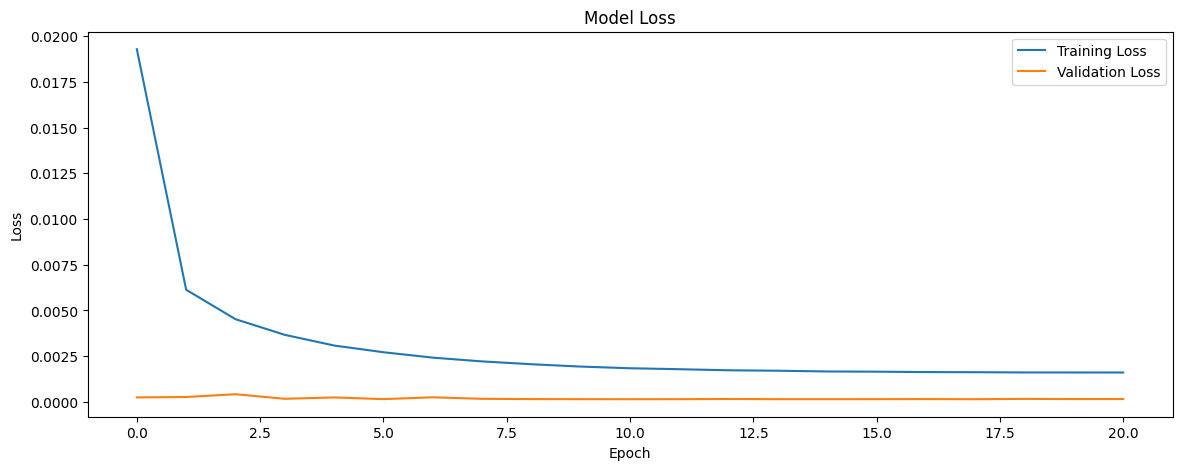

134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


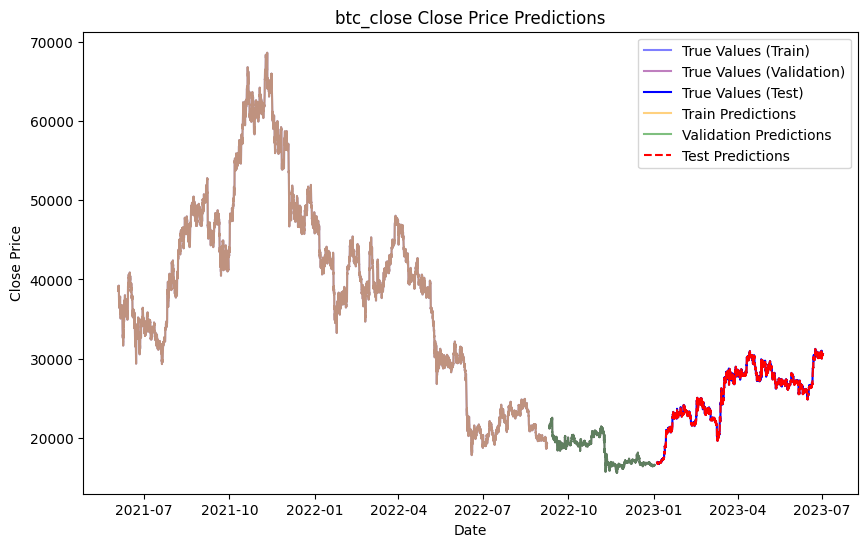

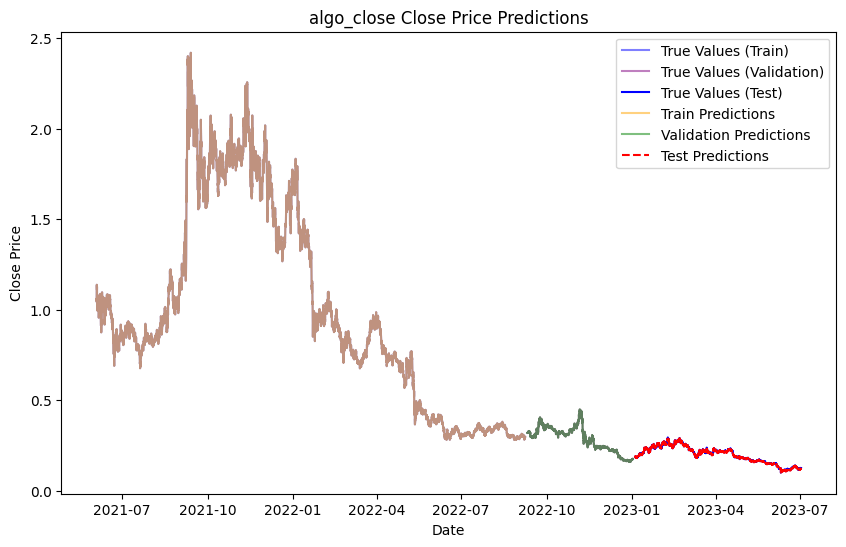

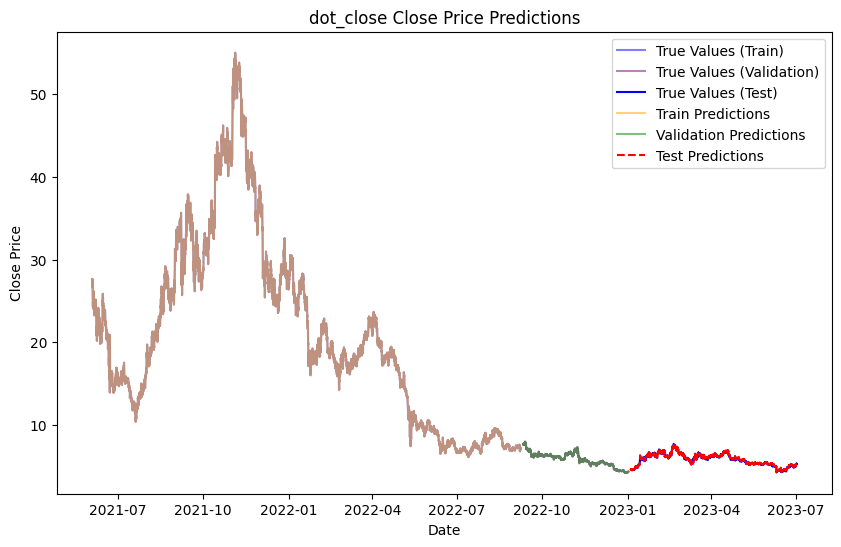

MAPE for btc_close: 0.0032141716395367457
RMSE for btc_close: 138.1854721515991
R² for btc_close: 0.9983349453012907
MAPE for algo_close: 0.0071168753735881595
RMSE for algo_close: 0.0018503826987825475
R² for algo_close: 0.9984171343258362
MAPE for dot_close: 0.006747022660920451
RMSE for dot_close: 0.053400998885462306
R² for dot_close: 0.9943068459751302

Check if inverse transform is consistent
First 5 scaled y_test values:
[[0.56040027 0.33350858 0.46391465]
 [0.55927772 0.33177893 0.46396015]
 [0.55491459 0.33016928 0.46483748]
 [0.56436867 0.33462977 0.46589721]
 [0.55557502 0.33039403 0.4625981 ]]
First 5 rescaled y_test values:
                     btc_close  algo_close  dot_close
timestamp                                            
2023-01-04 11:00:00      -0.78    0.000562  -0.007344
2023-01-04 12:00:00      -6.61   -0.000460  -0.006855
2023-01-04 13:00:00     -29.27   -0.001411   0.002563
2023-01-04 14:00:00      19.83    0.001224   0.013940
2023-01-04 15:00:00     -25.84 

In [19]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense
from tensorflow.keras.optimizers import Adam

# En iyi hiperparametrelerle modeli oluşturma
best_params = {
    'batch_size': 64,
    'epochs': 50,
    'model__dropout_rate': 0.4,
    'model__learning_rate': 0.001,
    'model__num_layers': 1,
    'model__num_units': 50
}

def create_best_model():
    optimizer = Adam(learning_rate=best_params['model__learning_rate'])
    model = Sequential()
    for i in range(best_params['model__num_layers']):
        if i == best_params['model__num_layers'] - 1:
            model.add(LSTM(units=best_params['model__num_units'], return_sequences=False, input_shape=(X_train.shape[1], X_train.shape[2])))
        else:
            model.add(LSTM(units=best_params['model__num_units'], return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
        model.add(Dropout(rate=best_params['model__dropout_rate']))
    model.add(Dense(units=3))  # 3 output (her bir kripto para için residual)
    model.compile(optimizer=optimizer, loss='mean_squared_error')
    return model

# EarlyStopping callback'i tanımlama
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Modeli oluşturma ve eğitme
best_model = create_best_model()
history = best_model.fit(X_train, y_train, epochs=best_params['epochs'], batch_size=best_params['batch_size'],
                         validation_data=(X_validation, y_validation), callbacks=[early_stopping], verbose=1)

# Modeli kaydetme
model_save_path = "3_Crypto_ARIMA_LSTM_1H_HYBRID.h5"
best_model.save(model_save_path)
print(f"Model saved to {model_save_path}")

# Modelin özetini yazdırma
best_model.summary()

# Eğitim ve doğrulama kayıplarını görselleştirme
plt.figure(figsize=(14, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()

# Test setindeki tahminleri yapma
y_pred_scaled = best_model.predict(X_test)

# Gerçek close prices ve tahminlerin yeniden ölçeklendirilmesi (train, val, test setleri için)
y_train_rescaled = pd.DataFrame(index=train_features.index[time_step:], columns=target_columns)
y_val_rescaled = pd.DataFrame(index=val_features.index[time_step:], columns=target_columns)
y_test_rescaled = pd.DataFrame(index=test_features.index[time_step:], columns=target_columns)
y_pred_rescaled = pd.DataFrame(index=test_features.index[time_step:], columns=target_columns)

for i, column in enumerate(target_columns):
    y_train_rescaled[column] = scalers_residuals[column].inverse_transform(y_train[:, i].reshape(-1, 1)).flatten()
    y_val_rescaled[column] = scalers_residuals[column].inverse_transform(y_validation[:, i].reshape(-1, 1)).flatten()
    y_test_rescaled[column] = scalers_residuals[column].inverse_transform(y_test[:, i].reshape(-1, 1)).flatten()
    y_pred_rescaled[column] = scalers_residuals[column].inverse_transform(y_pred_scaled[:, i].reshape(-1, 1)).flatten()

# Final close price tahminlerini elde etme (ARIMA + LSTM residual tahminleri)
final_train_predictions = arima_predictions_df.loc[train_features.index[time_step:]].add(y_train_rescaled.values, axis=0)
final_val_predictions = arima_predictions_df.loc[val_features.index[time_step:]].add(y_val_rescaled.values, axis=0)
final_test_predictions = arima_predictions_df.loc[test_features.index[time_step:]].add(y_pred_rescaled.values, axis=0)

# CSV dosyalarını kaydetme (train, validation, test setleri için)
train_df = pd.DataFrame(index=train_features.index[time_step:])
train_df['Actual_btc'] = daily_data.loc[train_features.index[time_step:], 'btc_close'].values
train_df['Predicted_btc'] = final_train_predictions['btc_close'].values
train_df['Actual_algo'] = daily_data.loc[train_features.index[time_step:], 'algo_close'].values
train_df['Predicted_algo'] = final_train_predictions['algo_close'].values
train_df['Actual_dot'] = daily_data.loc[train_features.index[time_step:], 'dot_close'].values
train_df['Predicted_dot'] = final_train_predictions['dot_close'].values
train_df.to_csv("train_1h.csv", index=True)

val_df = pd.DataFrame(index=val_features.index[time_step:])
val_df['Actual_btc'] = daily_data.loc[val_features.index[time_step:], 'btc_close'].values
val_df['Predicted_btc'] = final_val_predictions['btc_close'].values
val_df['Actual_algo'] = daily_data.loc[val_features.index[time_step:], 'algo_close'].values
val_df['Predicted_algo'] = final_val_predictions['algo_close'].values
val_df['Actual_dot'] = daily_data.loc[val_features.index[time_step:], 'dot_close'].values
val_df['Predicted_dot'] = final_val_predictions['dot_close'].values
val_df.to_csv("val_1h.csv", index=True)

test_df = pd.DataFrame(index=test_features.index[time_step:])
test_df['Actual_btc'] = daily_data.loc[test_features.index[time_step:], 'btc_close'].values
test_df['Predicted_btc'] = final_test_predictions['btc_close'].values
test_df['Actual_algo'] = daily_data.loc[test_features.index[time_step:], 'algo_close'].values
test_df['Predicted_algo'] = final_test_predictions['algo_close'].values
test_df['Actual_dot'] = daily_data.loc[test_features.index[time_step:], 'dot_close'].values
test_df['Predicted_dot'] = final_test_predictions['dot_close'].values
test_df.to_csv("test_1h.csv", index=True)

# Tahminleri ve gerçek değerleri görselleştirme (train, val, test için her kripto parayı ayrı ayrı çizme)
for i, column in enumerate(target_columns):
    plt.figure(figsize=(10, 6))

    # Gerçek değerleri gösterme (train, validation ve test setleri)
    plt.plot(train_features.index[time_step:], daily_data.loc[train_features.index[time_step:], column].values, label='True Values (Train)', color='blue', alpha=0.5)
    plt.plot(val_features.index[time_step:], daily_data.loc[val_features.index[time_step:], column].values, label='True Values (Validation)', color='purple', alpha=0.5)
    plt.plot(test_features.index[time_step:], daily_data.loc[test_features.index[time_step:], column].values, label='True Values (Test)', color='blue')

    # Train tahminlerini çizme
    plt.plot(train_features.index[time_step:], final_train_predictions[column].values, label='Train Predictions', color='orange', alpha=0.5)

    # Validation tahminlerini çizme
    plt.plot(val_features.index[time_step:], final_val_predictions[column].values, label='Validation Predictions', color='green', alpha=0.5)

    # Test tahminlerini çizme
    plt.plot(test_features.index[time_step:], final_test_predictions[column].values, label='Test Predictions', color='red', linestyle='dashed')

    plt.title(f'{column} Close Price Predictions')
    plt.xlabel('Date')
    plt.ylabel('Close Price')
    plt.legend()
    plt.show()

# Değerlendirme metriklerini yeniden hesaplama ve yazdırma
for i, column in enumerate(target_columns):
    mape = mean_absolute_percentage_error(daily_data.loc[test_features.index[time_step:], column].values, final_test_predictions[column].values)
    rmse = np.sqrt(mean_squared_error(daily_data.loc[test_features.index[time_step:], column].values, final_test_predictions[column].values))
    r2 = r2_score(daily_data.loc[test_features.index[time_step:], column].values, final_test_predictions[column].values)
    print(f'MAPE for {column}: {mape}')
    print(f'RMSE for {column}: {rmse}')
    print(f'R² for {column}: {r2}')

print("\nCheck if inverse transform is consistent")
print("First 5 scaled y_test values:")
print(y_test[:5])
print("First 5 rescaled y_test values:")
print(y_test_rescaled.head())
print("First 5 scaled y_pred values:")
print(y_pred_scaled[:5])
print("First 5 rescaled y_pred values:")
print(y_pred_rescaled.head())

In [56]:
y_train_rescaled.head()

,btc_close,algo_close,dot_close
timestamp,,,
2021-06-03 12:00:00,-496.53,-0.019345,-0.614989
2021-06-03 13:00:00,370.30,0.006919,0.156666
2021-06-03 14:00:00,-668.44,-0.017689,-0.651181
2021-06-03 15:00:00,128.22,0.005557,0.188735
2021-06-03 16:00:00,-41.43,0.031409,-0.129837
